In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [116]:
relation[relation['FATHER'].notnull()][1:]

,name,FATHER,MOTHER,CHILD,LABEL,POPULATION
119,SC_GMFUL5306339,SC_GMFUL5306347,SC_GMFUL5306355,NaN,GMFUL,Fula
120,SC_GMFUL5306340,SC_GMFUL5306348,SC_GMFUL5306356,NaN,GMFUL,Fula
121,SC_GMFUL5306341,SC_GMFUL5306349,SC_GMFUL5306357,NaN,GMFUL,Fula
122,SC_GMFUL5306343,SC_GMFUL5306351,SC_GMFUL5306359,NaN,GMFUL,Fula
123,SC_GMFUL5306344,SC_GMFUL5306352,SC_GMFUL5306360,NaN,GMFUL,Fula
...,...,...,...,...,...,...
489,SC_GMWOF5428858,SC_GMWOF5428874,SC_GMWOF5428866,NaN,GMWOF,Wolof
490,SC_GMWOF5428859,SC_GMWOF5428875,SC_GMWOF5428867,NaN,GMWOF,Wolof
491,SC_GMWOF5428861,SC_GMWOF5428877,SC_GMWOF5428869,NaN,GMWOF,Wolof
492,SC_GMWOF5428863,SC_GMWOF5428879,SC_GMWOF5428871,NaN,GMWOF,Wolof


In [2]:
relation = pd.read_csv('all_small_relationship.csv')
chr22 = pd.read_csv('./data/new_csv/chr22.csv')
chr22.set_index(["ALT"], inplace = True)
X = chr22.iloc[:,118:].T

LDA single feature

In [3]:
X["y"] = 0
X.loc["SC_GMFUL5306338","y"] = 1
X.loc["SC_GMFUL5306346","y"] = 1
X.loc["SC_GMFUL5306354","y"] = 1
Y = X["y"]
X = X.drop(["y"],axis=1)

In [4]:
clf0 = LDA()
clf0.fit(X, Y)
x_new = clf0.transform(X)
x_new.shape


(387, 1)

In [114]:
from scipy.spatial import distance
dist = pd.DataFrame(columns = ['idx', 'dist'])
for index,row in X.iteritems():
    c = X[index].to_frame()
    dst = distance.euclidean(c,x_new)
    d = pd.DataFrame([[index,dst]],columns = ['idx', 'dist'])
    dist = pd.concat([dist,d])
asc = dist.sort_values(by = ['dist'],ascending=True)

In [115]:
asc.to_csv('./data/new_csv/asc22.csv',index=False)

In [156]:
family = relation[relation['FATHER'].notnull()]
asc = pd.DataFrame()
n = 0
for row in family.iterrows():
    n+=1
    print(n)
    c = row[1]['name']
    f = row[1]['FATHER']
    m = row[1]['MOTHER']
    X["y"] = 0
    X.loc[c,"y"] = 1
    X.loc[f,"y"] = 1
    if not m:
        X.loc[m,"y"] = 1
    Y = X["y"]
    X = X.drop(["y"],axis=1)
    clf = LDA()
    clf.fit(X, Y)
    x_new = clf.transform(X)
    print("lda")
    dist = np.sqrt(np.sum((X-x_new)**2,axis=0))
    dist = dist.rename_axis('idx').reset_index()
    print("save")
    sort_dist = dist.sort_values(by = [0],ascending=True)
    asc = pd.read_csv('./data/new_csv/asc22.csv')
    asc[c] = sort_dist['idx']
    asc.to_csv('./data/new_csv/asc22.csv',index=False)

1
lda
save
2
lda
save
3
lda
save
4
lda
save
5
lda
save
6
lda
save
7
lda
save
8
lda
save
9
lda
save
10
lda
save
11
lda
save
12
lda
save
13
lda
save
14
lda
save
15
lda
save
16
lda
save
17
lda
save
18
lda
save
19
lda
save
20
lda
save
21
lda
save
22
lda
save
23
lda
save
24
lda
save
25
lda
save
26
lda
save
27
lda
save
28
lda
save
29
lda
save
30
lda
save
31
lda
save
32
lda
save
33
lda
save
34
lda
save
35
lda
save
36
lda
save
37
lda
save
38
lda
save
39
lda
save
40
lda
save
41
lda
save
42
lda
save
43
lda
save
44
lda
save
45
lda
save
46
lda
save
47
lda
save
48
lda
save
49
lda
save
50
lda
save
51
lda
save
52
lda
save
53
lda
save
54
lda
save
55
lda
save
56
lda
save
57
lda
save
58
lda
save
59
lda
save
60
lda
save
61
lda
save
62
lda
save
63
lda
save
64
lda
save
65
lda
save
66
lda
save
67
lda
save
68
lda
save
69
lda
save
70
lda
save
71
lda
save
72
lda
save
73
lda
save
74
lda
save
75
lda
save
76
lda
save
77
lda
save
78
lda
save
79
lda
save
80
lda
save
81
lda
save
82
lda
save
83
lda
save
84
lda
save
8

In [157]:
asc = pd.read_csv('./data/new_csv/asc22.csv')

union

In [277]:
feature = asc[:10000]
fset = {"0"}
for index,r in feature.T.iteritems():
    for f in feature.T[index].unique():
        
        fset.add(f)
fset.remove("0")
flist = list(fset)
len(flist)

19825

In [278]:
from random import choice
nl = []
ml = []
snl = []
for row in family.iterrows():
    allname = relation[118:]['name']
    allname = list(allname.values)
    allname.remove(row[1]['name'])
    allname.remove(row[1]['FATHER'])

    fe = X.loc[:,flist]
    c = fe.loc[row[1]['name']]
    fa = fe.loc[row[1]['FATHER']]
    s = fe.loc[choice(allname)]
    #s = fe.loc['SC_GMWOF5428865']
    n = 0
    m = 0
    sn=0
    for ind,v in c[c==1].items():
        m += 1
        if(v == 1 and fa[ind] != 0):
            n+=1
        if(v == 1 and s[ind] != 0):
            sn+=1

    nl.append(n/m)

    snl.append(sn/m)


In [276]:
print(pd.DataFrame(nl).mean())
print(pd.DataFrame(snl).mean())

0    0.910674
dtype: float64
0    0.727402
dtype: float64


LDA classify feature

In [190]:
clf = LDA(n_components = 3)
Yc = relation['LABEL'].iloc[118:]
clf.fit(X, Yc)
x_ida = clf.transform(X)
x_ida = pd.DataFrame(x_ida)

PCA classify feature

In [204]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
x_pca = pca.transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca['y'] = Yc

/var/folders/7q/9jgys8t94kg68mx3fyvrxnmh0000gn/T/ipykernel_1670/1813665938.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = Axes3D(fig)


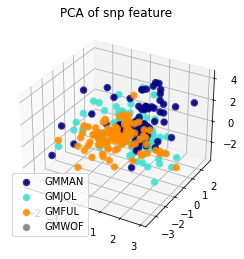

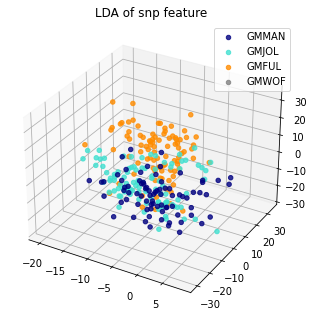

In [209]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = plt.axes(projection='3d')
colors = ["navy", "turquoise", "darkorange","grey"]
lw = 3

for color, i, target_name in zip(colors, ["GMMAN", "GMJOL", "GMFUL", "GMWOF"], ["GMMAN", "GMJOL", "GMFUL", "GMWOF"]):
    ax1.scatter3D(
        x_ida[x_ida['y'] == i][0], x_ida[x_ida['y'] == i][1], x_ida[x_ida['y'] == i][2], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of snp feature")


fig=plt.figure()
ax2 = Axes3D(fig)
for color, i, target_name in zip(colors, ["GMMAN", "GMJOL", "GMFUL", "GMWOF"], ["GMMAN", "GMJOL", "GMFUL", "GMWOF"]):
    ax2.scatter3D(
        x_pca[x_pca['y'] == i][0], x_pca[x_pca['y'] == i][1],x_pca[x_pca['y'] == i][2], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of snp feature")
plt.show()

In [87]:
fns = np.concatenate((50*np.logspace(1,5,num=5,endpoint = True,base = 10),25*np.logspace(1,5,num=5,endpoint = True,base = 10,axis = 0)),axis = 0)
fns = np.sort(fns).astype('i')
nl = []
ml = []
snl = []
for fn in fns:
   
    f = asc['idx'].iloc[:fn]
    fe = X.loc[:,f.tolist()]
    c = fe.loc['SC_GMFUL5306338']
    fa = fe.loc['SC_GMFUL5306346']
    s = fe.loc['SC_GMWOF5428865']
    n = 0
    m = 0
    sn=0
    for ind,v in c[c==1].items():
        m += 1
        if(v == 1 and fa[ind] != 0):
            n+=1
        if(v == 1 and s[ind] != 0):
            sn+=1
    print(n/m)
    nl.append(n/m)
    print(sn/m)
    snl.append(sn/m)
    print(fn)

0.8311688311688312
0.07142857142857142
250
0.8138297872340425
0.10106382978723404
500
0.8523985239852399
0.09225092250922509
2500
0.8533333333333334
0.10333333333333333
5000
0.9048361934477379
0.15756630265210608
25000
0.9057187017001546
0.15765069551777433
50000
0.9097633136094675
0.15976331360946747
250000
0.9496466431095406
0.33568904593639576
500000
0.990140436637806
0.8364058163138489
2500000
0.990140436637806
0.8364058163138489
5000000


In [90]:
fns

array([    250,     500,    2500,    5000,   25000,   50000,  250000,
        500000, 2500000, 5000000], dtype=int32)

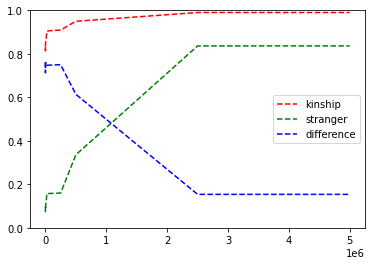

In [98]:
l1 = plt.plot(fns,nl,'r--',label='kinship')
l2 = plt.plot(fns,snl,'g--',label='stranger')
l3 = plt.plot(fns,np.array(nl)-np.array(snl),'b--',label = 'difference')
plt.legend()
plt.ylim(0,1)
plt.xlabel('chosed feature number')
plt.ylabel('test result')
plt.title('kinship test result on num of features')
plt.show()
plt.savefig('./pics/')